In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("hate_crime.csv") 
data.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [27]:
data['OFFENSE_NAME'] = data['OFFENSE_NAME'].apply(lambda x: x.split(";", 1)[0])
# As our first step let's dive into the TYPES of the storms. To do that, first, let's figure out what type of events 
# are we dealing with in our dataset.

# getting differnt types of the storms
data.OFFENSE_NAME.unique()

array(['Intimidation', 'Simple Assault', 'Aggravated Assault', 'Robbery',
       'Destruction/Damage/Vandalism of Property', 'Arson',
       'Burglary/Breaking & Entering',
       'Murder and Nonnegligent Manslaughter', 'Not Specified', 'Rape',
       'Motor Vehicle Theft', 'Drug/Narcotic Violations',
       'Weapon Law Violations', 'Theft From Motor Vehicle', 'Shoplifting',
       'All Other Larceny', 'Theft of Motor Vehicle Parts or Accessories',
       'Fondling', 'Counterfeiting/Forgery', 'Kidnapping/Abduction',
       'Theft From Building', 'Pornography/Obscene Material',
       'Embezzlement', 'Purse-snatching', 'Drug Equipment Violations',
       'Credit Card/Automated Teller Machine Fraud',
       'Sexual Assault With An Object',
       'False Pretenses/Swindle/Confidence Game', 'Pocket-picking',
       'Welfare Fraud', 'Extortion/Blackmail', 'Stolen Property Offenses',
       'Incest', 'Sodomy', 'Negligent Manslaughter', 'Statutory Rape',
       'Theft From Coin-Operated Machi

In [28]:
# After that, let's figure out what types of storms are hitting the U.S. the most. As a result, follow the code below 
# to count the occurrence of each event type in the entire dataset.

# add a new column with the total number of same events (# of hurricanes, tornadoes, etc.) respective to the event 
# type
result = data.groupby('OFFENSE_NAME').first()
result['COUNT'] = data['OFFENSE_NAME'].value_counts()
result.reset_index(inplace=True)
result = result[['OFFENSE_NAME','COUNT']]

# print the counts of each event type
print(result)

                                   OFFENSE_NAME  COUNT
0                            Aggravated Assault  24810
1                             All Other Larceny   2192
2                                Animal Cruelty      8
3                                         Arson   1442
4           Assisting or Promoting Prostitution      6
5                              Betting/Wagering      1
6                                       Bribery      2
7                  Burglary/Breaking & Entering   3710
8                        Counterfeiting/Forgery    202
9    Credit Card/Automated Teller Machine Fraud    154
10     Destruction/Damage/Vandalism of Property  69577
11                    Drug Equipment Violations    363
12                     Drug/Narcotic Violations   1038
13                                 Embezzlement     53
14                          Extortion/Blackmail     49
15      False Pretenses/Swindle/Confidence Game    290
16                                     Fondling    189
17        

In [29]:
# Now that we know the number of occurence for each of the event types, let's put it inside the data frame as a new 
# column
data = pd.merge(data, result, on='OFFENSE_NAME', how='left')
data.head(10)

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,COUNT
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,65150
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,41745
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,24810
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,24810
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,24810
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S,3824
6,3019,1991,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S,24810
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault,2.0,Residence/Home,Anti-White,Individual,M,S,24810
8,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S,65150
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,3824


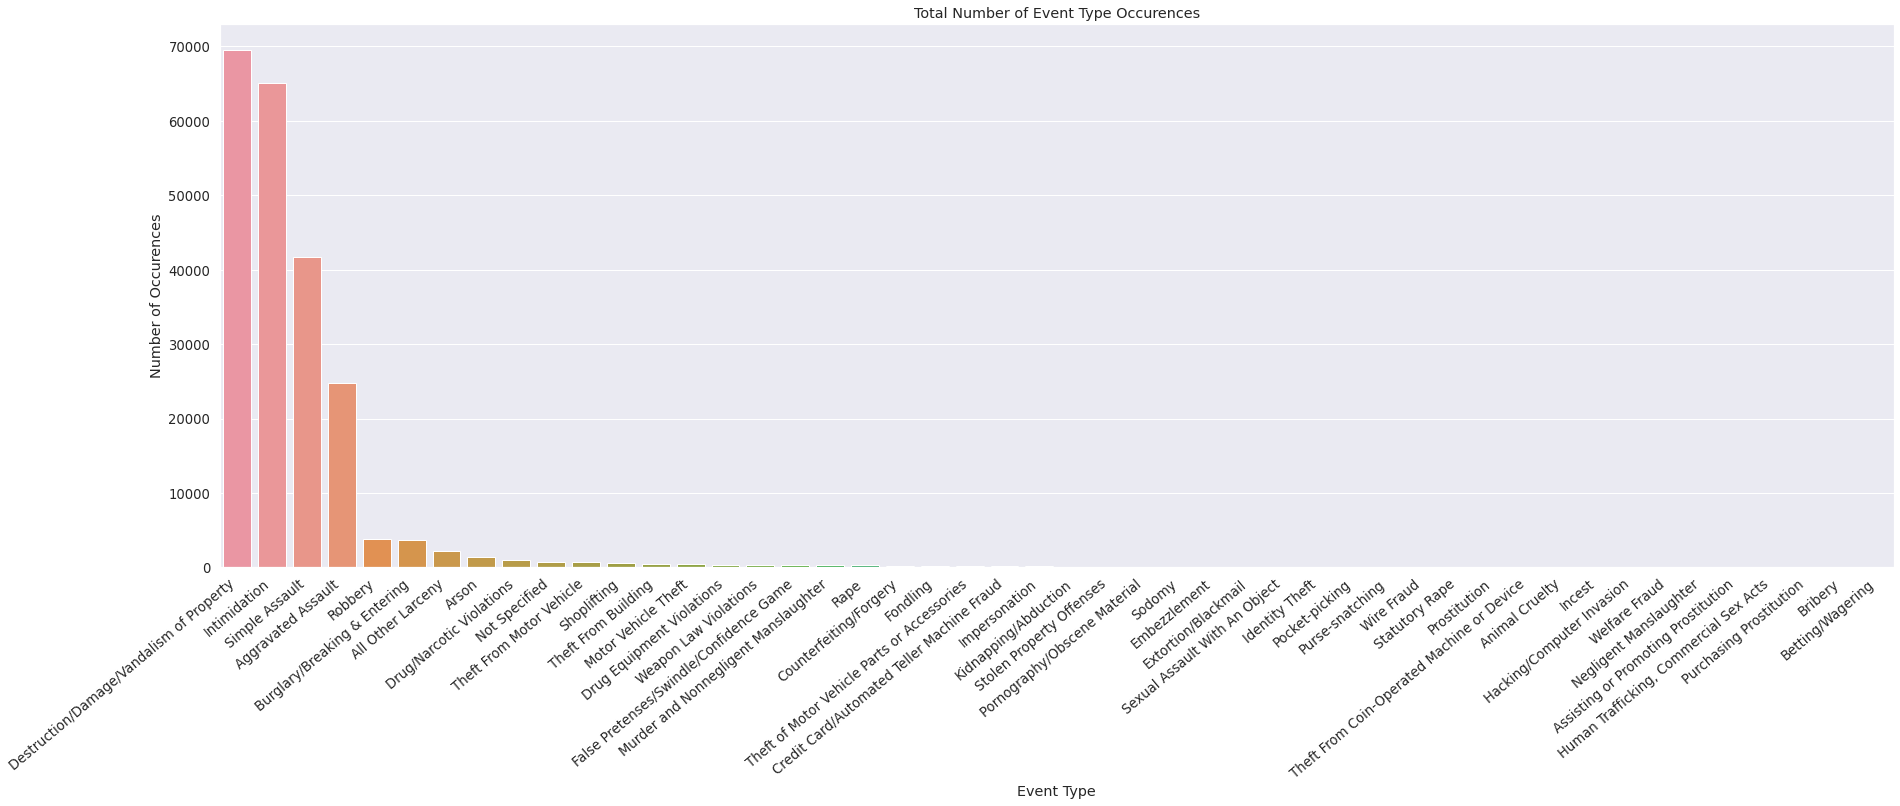

In [46]:
plt.figure(figsize = (30, 10))
plt.title('Total Number of Event Type Occurences')
sns.set(font_scale=1.2)
count_bar = sns.countplot(x = 'OFFENSE_NAME', data = data,\
                          # order the events based on the number of occurences
                          order = data['OFFENSE_NAME'].value_counts().index)
count_bar.set_xticklabels(count_bar.get_xticklabels(), rotation=40, ha="right");
count_bar.set(xlabel='Event Type', ylabel='Number of Occurences');

In [50]:
# As you may see, we have some events such as Thunderstorm Wind that had more than 20k occurrences whereas the Astronomical Low Tide (who knows what that is!), had almost no occurrences. As a result, to make the progress easier, let's take a look at the TOP 10 event types that occurred, and rename the rest of the event types to Other, by running the following code.

def label_event_type (row):
   event = row['OFFENSE_NAME']
   if event in ['Destruction/Damage/Vandalism of Property', 'Intimidation', 'Simple Assault', 'Aggravated Assault', \
                'Robbery', 'Burglary/Breaking & Entering', 'All Other Larceny', 'Arson']:
      return event
   return 'Other'

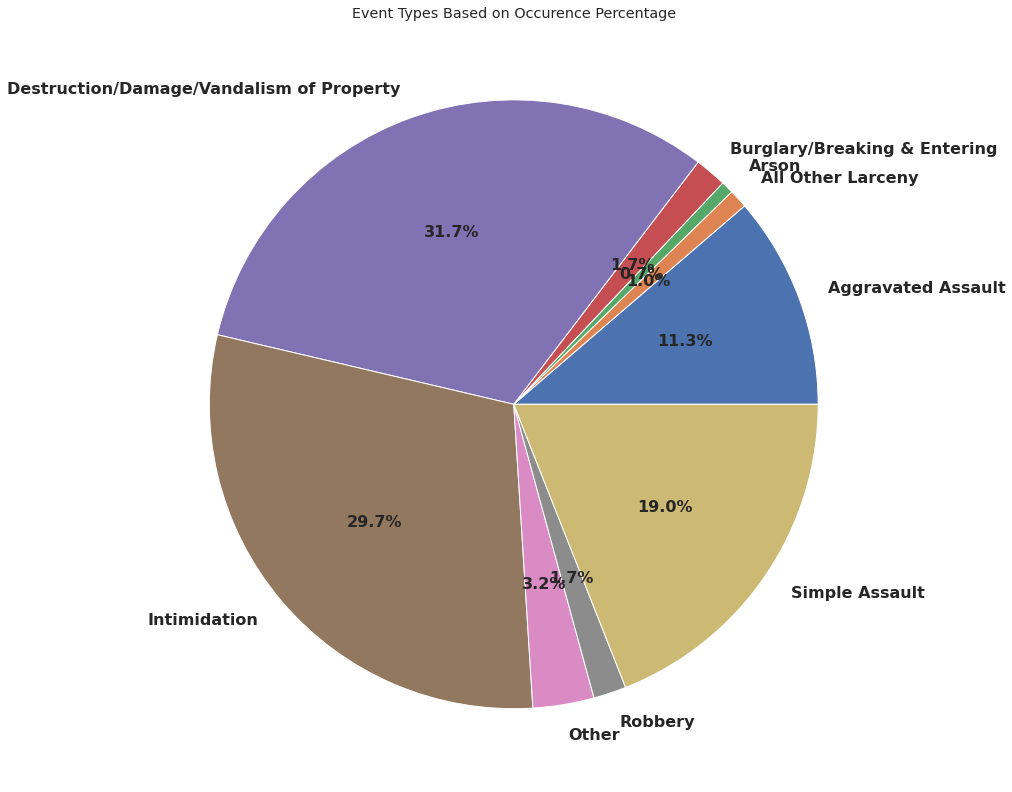

In [51]:
data['OFFENSE_NAME_MODIFIED'] = data.apply (lambda row: label_event_type(row), axis=1)

df_numbers_of_types = data.groupby('OFFENSE_NAME_MODIFIED')['INCIDENT_ID'].nunique()
df_numbers_of_types.sort_values(ascending=False)
label = list(map(str, df_numbers_of_types.keys()))

plt.figure(figsize = (14, 14))
plt.pie(df_numbers_of_types, labels = label, autopct = '%1.1f%%', textprops={'fontsize': 16, 'fontweight': "600"})

plt.title('Event Types Based on Occurence Percentage')
plt.show() 

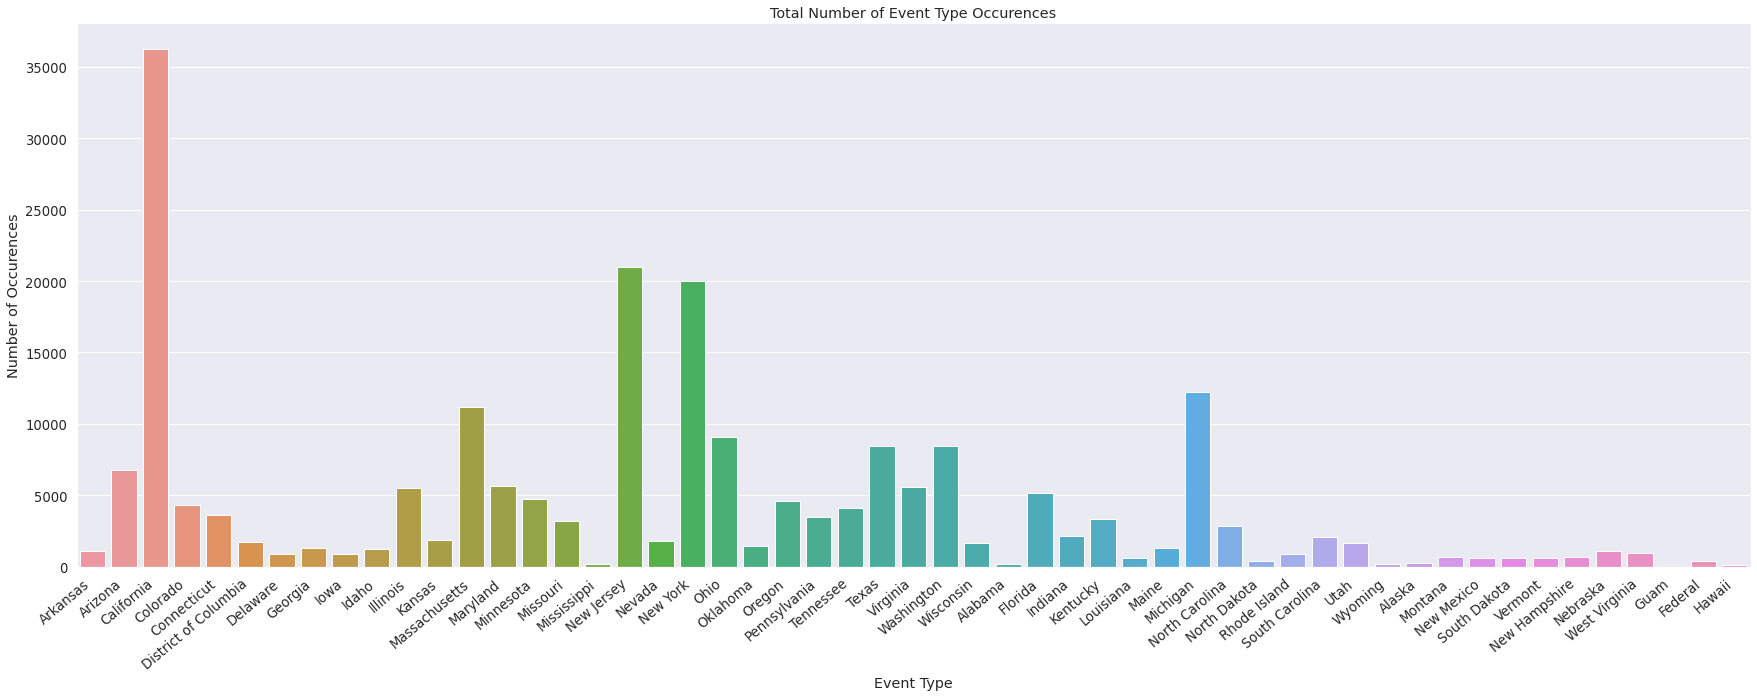

In [54]:
plt.figure(figsize = (30, 10))
plt.title('Total Number of Event Type Occurences')
sns.set(font_scale=1.2)
count_bar = sns.countplot(x = 'STATE_NAME', data = data)
count_bar.set_xticklabels(count_bar.get_xticklabels(), rotation=40, ha="right");
count_bar.set(xlabel='Event Type', ylabel='Number of Occurences');

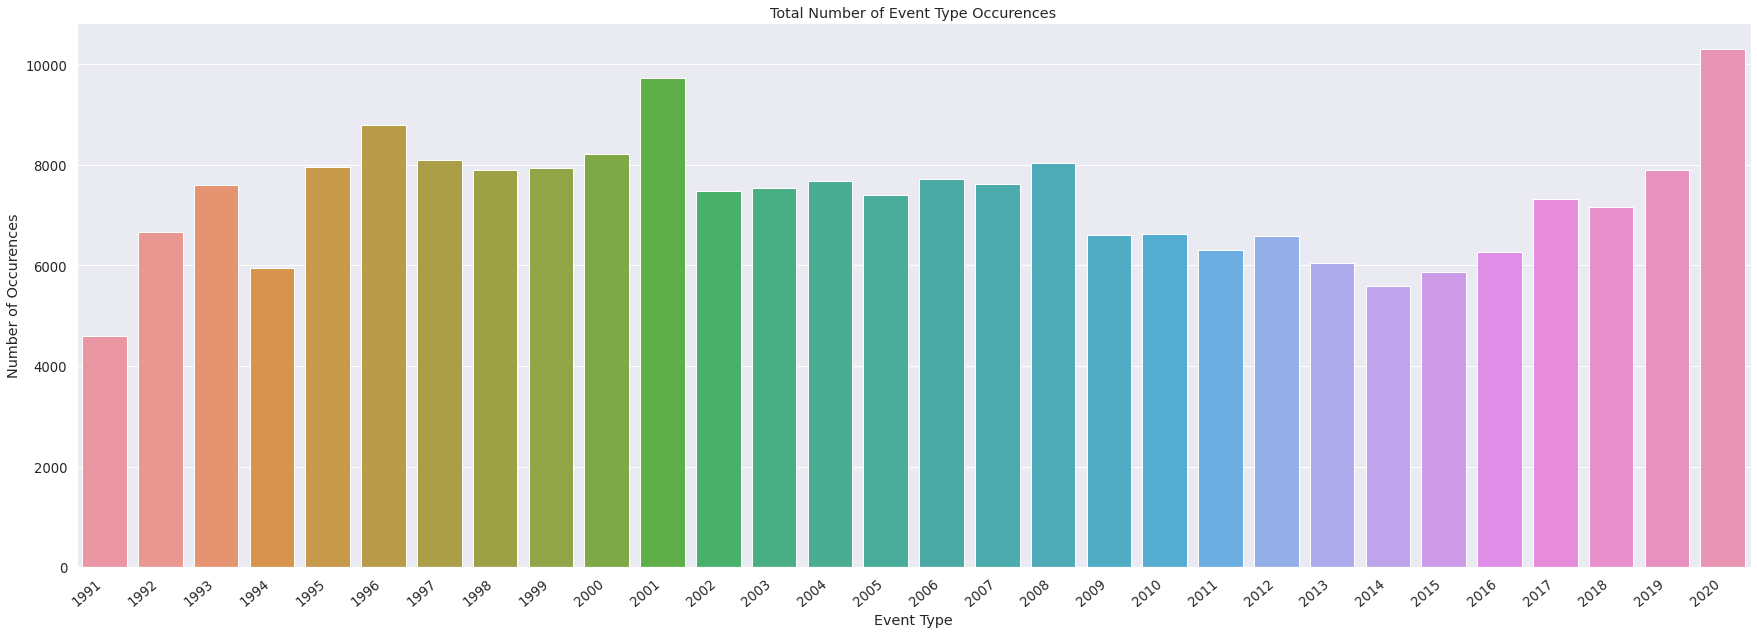

In [56]:
plt.figure(figsize = (30, 10))
plt.title('Total Number of Event Type Occurences')
sns.set(font_scale=1.2)
count_bar = sns.countplot(x = 'DATA_YEAR', data = data)
count_bar.set_xticklabels(count_bar.get_xticklabels(), rotation=40, ha="right");
count_bar.set(xlabel='Event Type', ylabel='Number of Occurences');